# Μέρος Α

### Maximum Likelihood estimation

### α)Εκτίμηση παραμέτρων θ1,θ2

In [54]:
#Εξάγουμε σημαντικές βιβλιοθήκες της python για την οπτικοποίηση των αποτελεσμάτων και για αριθμητικούς υπολογισμούς
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from math import pi,log

In [55]:
# Δημιουργούμε κλάση Classifier με Constructor και 2 συναρτήσεις fit και predict

class Classifier:
    def __init__(self):
        self.D1=[]
        self.D2=[]
        self.theta1=0
        self.theta2=0
        self.x, self.theta = sym.symbols('x theta')
        self.p = (1 / pi) * (1 / (1 + (self.x - self.theta) ** 2))
        
    # Μέσω της συνάρτησης fit κάνουμε το training για την εκτίμηση των παραμέτρων θ1,θ2
    # Παίρνει 3 ορίσματα, το σύνολο D την κάθε κλάση , ένα theta_list στο οποίο παίρνει ένα εύρος απο
    # υποψήφιες τιμές θ ,από τις οποίες μέσω Maximum Likelihood επιλέγουμε την καλύτερη τιμή.
    # Το τρίτο όρισμο υποδηλώνει την κλάση από την οποία τραβάμε τα δεδομένα (1 για την κλάση ω1 , 2 για την ω2)  
    
    def fit(self, D, theta_list, label):
    # Υπολογισμός του λογάριθμου της πιθανότητας p(x|θ) για κάθε δεδομένο στο D
        ml = sum(sym.log(self.p.subs(self.x, d)) for d in D)
    
    # Υπολογισμός της παραγώγου του λογαρίθμου της πιθανότητας ως συνάρτηση της θ
        ml_diff = sym.lambdify(self.theta, ml.diff(self.theta))
    
    # Αρχικοποίηση της ελάχιστης απόλυτης τιμής της παραγώγου
        min = 100  # Μια μεγάλη αρχική τιμή για να διασφαλίσουμε ότι βρίσκουμε το μικρότερο
        k = 0  # Δείκτης του θ που έχει την ελάχιστη απόλυτη τιμή της παραγώγου
    
    # Βρόχος για να βρούμε την τιμή του θ που ελαχιστοποιεί την παράγωγο
        for i in range(0, len(theta_list)):
            if abs(ml_diff(theta_list[i])) < min:
                min = abs(ml_diff(theta_list[i]))  # Ενημέρωση της ελάχιστης τιμής
                k = i                              # Ενημέρωση του δείκτη
    
    # Υπολογισμός του λογάριθμου της πιθανότητας p(x|θ) για κάθε συνδυασμό δεδομένων και θ
        log_p_D = [[sym.log(self.p.subs({self.x: d, self.theta: th})).evalf(4) for th in theta_list] for d in D]
    
    # Ενημέρωση των δεδομένων και της βέλτιστης τιμής θ ανάλογα με την ετικέτα (label)
        if label == 1:
            self.D1 += D                 # Ενημέρωση του συνόλου δεδομένων για την ετικέτα 1
            self.theta1 = theta_list[k]  # Αποθήκευση της βέλτιστης τιμής θ για την ετικέτα 1
        elif label == 2:
            self.D2 += D                 # Ενημέρωση του συνόλου δεδομένων για την ετικέτα 2
            self.theta2 = theta_list[k]  # Αποθήκευση της βέλτιστης τιμής θ για την ετικέτα 2
    
    # Επιστροφή της παραγώγου στην επιλεγμένη θ, της επιλεγμένης θ και του πίνακα log_p_D
        return ml_diff(theta_list[k]), theta_list[k], log_p_D


    # Η συνάρτηση predict υλοποιεί την συνάρτηση διάκρισης.
    # Παίρνει ως είσοδο ένα σύνολο D και τις πιθανότητες P(ω1) και P(ω2).
    # Επιστρέφει για καθένα από δείγματα του συνόλου D την αντίστοιχη τιμή διάκρισης
    
    def predict(self,D,p_omega1,p_omega2):
        g = sym.log(self.p.subs({self.x: self.x, self.theta: self.theta1})) - sym.log(self.p.subs({self.x: self.x, self.theta: self.theta2})) + sym.log(p_omega1 / p_omega2)
        g_list = [g.subs({self.x: d}) for d in D]
        return g_list

In [89]:
# Φτιάχνουμε object Classifier() 
class1=Classifier()

# Αρχικοποιούμε τα σύνολα εκπαίδευσης
D1=[2.8,-0.4,-0.8,2.3,-0.3,3.6,4.1]
D2=[-4.5,-3.4,-3.1,-3.0,-2.3]

# Ορίζουμε το εύρος αναζήτησης για την εύρεση του θ1 και θ2 αντίστοιχα 
theta1=np.arange(-4, 4,0.01)
theta2=np.arange(-4, 4,0.01)




θ1_hat: 2.5999999999998593
θ2_hat: -3.160000000000018


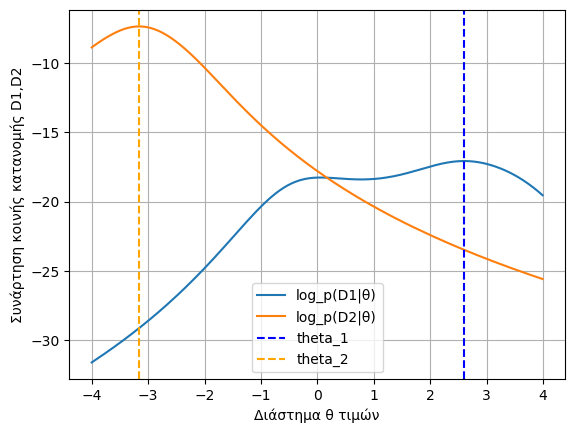

In [90]:
# Επειδή έχουμε ορίσει μικρό βήμα για το διάστημα θ θα πάρει λίγο χρόνο να τρέξει.

# Χρησιμοποιο΄υμε την συνάρτηση fit για να υπολογίζουμε τις εκτιμήσεις
list1=class1.fit(D1,theta1,1) #D1 για το σύνολο ω1,theta1 για το εύρος αναζήτησης θ1 για την πρώτη κλάση, και 1 για ξέρει ότι κανουμε υπολογισμούς για την εκτ΄μηση θ1
list2=class1.fit(D2,theta2,2) #D2 για το σύνολο ω2,theta2 για το εύρος αναζήτησης θ2 για την πρώτη κλάση, και 2 για ξέρει ότι κανουμε υπολογισμούς για την εκτ΄μηση θ2

# Η εκτίμησεις που προκύπτουν βρίσκονται στο δεύτερο στοιχείο της λιστας που επιστρέφει η συνάρτηση fit
theta1_hat=list1[1]
theta2_hat=list2[1]

# Τυπώνουμε τις εκτιμήσεις
print('θ1_hat:',theta1_hat)
print('θ2_hat:',theta2_hat)

log_pD1=np.zeros((len(theta1)))
log_pD2=np.zeros((len(theta2)))

# Αποθηκεύουμε τις λογαριθμικές τιμές που έχει επιστρέψει η συνάρτηση fit για να οπτικοποιήσουμε τα αποτελέσματα

for i in range(0,len(D1)):
    log_pD1=log_pD1+list1[2][i]
for j in range(0,len(D2)):
    log_pD2=log_pD2+list2[2][j]
    
plt.figure(1)

# Plotting των logp(D1|θ)και logp(D2|θ)
plt.plot(theta1,log_pD1,label='log_p(D1|θ)')
plt.plot(theta2,log_pD2,label='log_p(D2|θ)')

# Kατακόρυφες ευθείες στις οποίες βρίκονται οι εκτιμήσεις για τις 2 κλάσεις

plt.axvline(x=theta1_hat,color='b',label='theta_1',linestyle='--')
plt.axvline(x=theta2_hat,color='orange',label='theta_2',linestyle='--')
plt.xlabel('Διάστημα θ τιμών')
plt.ylabel('Συνάρτηση κοινής κατανομής D1,D2')
plt.legend()
plt.grid(True)
plt.show()



### β) Ταξινόμηση των 2 συνόλων

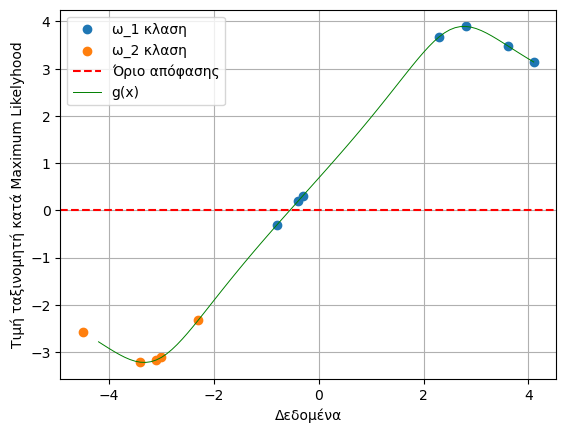

Πλήθος λάθος ταξινομημένων: 1
Ταξινομήθηκαν λάθος τα: [-0.8]


In [58]:
# πα΄ίρνουμε τις τιμές που επιστρέφει η συνάρτηση g για το αρχικό σύνολο εκπαίδευσης
D=D1+D2
g_values=class1.predict(D,7/12,5/12)

array=np.arange(-4.2,4.2,0.1)

g=class1.predict(array,7/12,5/12)

# Οπτικοποιούμε τα δεδομένα σε σχέση με το όριο απόφασης
plt.figure()

plt.scatter(D1,g_values[0:len(D1)],label='ω_1 κλαση')
plt.scatter(D2,g_values[len(D1):len(D)],label='ω_2 κλαση')
plt.axhline(y=0,label='Όριο απόφασης',color='r',linestyle='--')
plt.plot(array,g,label='g(x)',color='g',linewidth=0.7)
plt.legend()
plt.ylabel('Τιμή ταξινομητή κατά Maximum Likelyhood')
plt.xlabel('Δεδομένα')


# αποθηκεύουμε τα πλήθος τον στοιχείων που δεν ταξινομήθηκαν σωστά
missclassified=0
miss_list=[]


y_test=[1,1,1,1,1,1,1,2,2,2,2,2]

# Mε αυτή τη συνάρτηση συγκρίνουμε την τιμή της predict με αυτή πραγματική κλάση (ω1,ω2) που ανήκει κάθε δείγμα
def accuracy(y_test,g_values,D):
    missclassified=0
    miss_list=[]
    for i in range(0,len(g_values)):
        if g_values[i]<0 and y_test[i]==1:
            missclassified+=1
            miss_list.append(D[i])
        elif g_values[i]>0 and y_test[i]==2:
            missclassified+=1
            miss_list.append(D[i])
    return missclassified,miss_list
    
plt.grid(True)
plt.show()

[m1,m2]=accuracy(y_test,g_values,D)
print('Πλήθος λάθος ταξινομημένων:',m1)
print('Ταξινομήθηκαν λάθος τα:',m2)

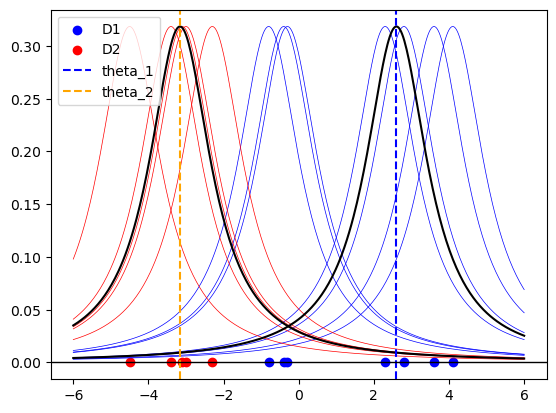

In [59]:

#Plot points from D1 and D2 on the y=0 axis
plt.scatter(D1, np.zeros_like(D1), color='blue', label='D1')  # Plot D1 points
plt.scatter(D2, np.zeros_like(D2), color='red', label='D2')   # Plot D2 points
x_vals = np.linspace(-6, 6, 400)

for theta in D1:
    y_vals = 1/3.14 * (1 / (1 + (x_vals - theta)**2))
    plt.plot(x_vals, y_vals, color = 'blue', linewidth=0.5)

for theta in D2:
    y_vals = 1/3.14 * (1 / (1 + (x_vals - theta)**2))
    plt.plot(x_vals, y_vals, color = 'red', linewidth=0.5)

y_vals = 1/3.14 * (1 / (1 + (x_vals - theta1_hat)**2))
plt.plot(x_vals, y_vals, color = 'black')

y_vals = 1/3.14 * (1 / (1 + (x_vals - theta2_hat)**2))  # Calculate y_vals for each theta
plt.plot(x_vals, y_vals, color = 'black')

plt.axvline(x=theta1_hat,color='b',label='theta_1',linestyle='--')
plt.axvline(x=theta2_hat,color='orange',label='theta_2',linestyle='--')


# Add labels and a legend
plt.axhline(0, color='black',linewidth=1)  # y=0 axis line
plt.legend()
plt.show()

# Μέρος B
### Bayesian Estimation

### α)εκ των υστέρων πυκνότητες πιθανότητας p(θ|D1) και p(θ|D2)

In [60]:
class Classifier2:
    def __init__(self):
        # Ορισμός των συμβολικών μεταβλητών x (δεδομένα) και θ (παράμετρος)
        self.x, self.theta = sym.symbols('x theta')
        
        # Αρχικοποίηση των συνόλων δεδομένων για τις δύο κατηγορίες
        self.D1 = []
        self.D2 = []
        
        # Κατανομή πιθανότητας για τη θ
        self.p_theta = (1 / (10 * pi)) * (1 / (1 + (self.theta / 10) ** 2))
        
        # Υπό συνθήκη κατανομή πιθανότητας για x δεδομένου θ
        self.p_theta_x = (1 / pi) * (1 / (1 + (self.x - self.theta) ** 2))

    def fit(self, D, u, flag):
        # Υπολογισμός της πιθανότητας p(x|θ) για κάθε σημείο δεδομένων στο D
        p_x_list = [self.p_theta_x.subs({self.x: d, self.theta: self.theta}).evalf(5) for d in D]
        
        # Υπολογισμός του γινομένου όλων των p(x|θ) στο D
        product = 1
        for i in range(0, len(p_x_list)):
            product = product * p_x_list[i]
        
        # Υπολογισμός της συνολικής πιθανότητας p(θ,x)
        area = 0
        p_total = product * self.p_theta
        
        # Υπολογισμός του ολοκληρώματος με τον κανόνα τραπεζίου
        for i in range(0, len(u)):
            if i == 0 or i == len(u) - 1:
                area += (0.1 / 2) * p_total.subs({self.theta: u[i]}).evalf(5)
            else:
                area += 2 * (0.1 / 2) * p_total.subs({self.theta: u[i]}).evalf(5)
        
        # Υπολογισμός της πιθανοφάνειας p(θ|D)
        p_list_d = [(p_total / area).subs({self.theta: d}).evalf(5) for d in u]
        
        # Ενημέρωση των δεδομένων και της πιθανότητας ανάλογα με την κατηγορία
        if flag == 1:
            self.D1 = D
            self.p_theta_d1 = p_total / area
        elif flag == 2:
            self.D2 = D
            self.p_theta_d2 = p_total / area
        
        # Επιστροφή της πιθανοφάνειας για κάθε σημείο δεδομένων στο u
        return p_list_d

    # η συνάρτηση create φτιάχνει τις p(x|D1) και p(x|D2) πα΄ίρνοντας σαν όρισμα ένα διάνυσμα u στο οποίο γίνεται η ολοκλήρωση.
    def create_p(self, u):
        # Υπολογισμός των p(x|D1) και p(x|D2) μέσω του κανόνα τραπεζίου
        product1 = self.p_theta_x * self.p_theta_d1
        product2 = self.p_theta_x * self.p_theta_d2
        self.p_x_d1 = 0
        self.p_x_d2 = 0
        
        for i in range(0, len(u)):
            if i == 0 or i == len(u) - 1:
                self.p_x_d1 += (0.1 / 2) * product1.subs({self.x: self.x, self.theta: u[i]}).evalf(5)
                self.p_x_d2 += (0.1 / 2) * product2.subs({self.x: self.x, self.theta: u[i]}).evalf(5)
            else:
                self.p_x_d1 += 2 * (0.1 / 2) * product1.subs({self.x: self.x, self.theta: u[i]}).evalf(5)
                self.p_x_d2 += 2 * (0.1 / 2) * product2.subs({self.x: self.x, self.theta: u[i]}).evalf(5)

    def predict(self, D, p_omega1, p_omega2):
        # Υπολογισμός της διακριτικής συνάρτησης g(x) για την απόφαση
        g = sym.log(self.p_x_d1.subs({self.x: self.x})) - \
            sym.log(self.p_x_d2.subs({self.x: self.x})) + \
            sym.log(p_omega1 / p_omega2)
        
        # Υπολογισμός της g(x) για κάθε σημείο δεδομένων στο D
        g_list = [g.subs({self.x: d}) for d in D]
        
        # Επιστροφή της λίστας g(x) (σκορ απόφασης)
        return g_list


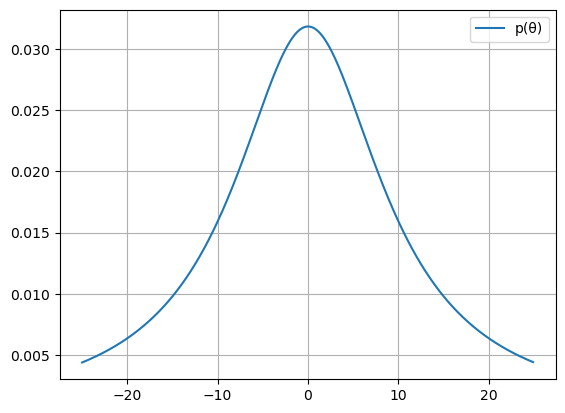

In [61]:
class1=Classifier2()

D1=[2.8,-0.4,-0.8,2.3,-0.3,3.6,4.1]
D2=[-4.5,-3.4,-3.1,-3.0,-2.3]

# Δημιουργούμε εύρος  ολοκλήρωσης για την μεταβλητή θ
u=np.arange(-25,25,0.1)

# Εξάγουμε τις p(θ|D1) και p(θ|D2) μέσω της συνάρτησης fit
p_list_d1=class1.fit(D1,u,1)
p_list_d2=class1.fit(D2,u,2)
p=(1/(10*pi))*(1/(1+(u/10)**2))
plt.figure(10)
plt.plot(u,p,label='p(θ)')
plt.grid(True)
plt.legend()
plt.show()

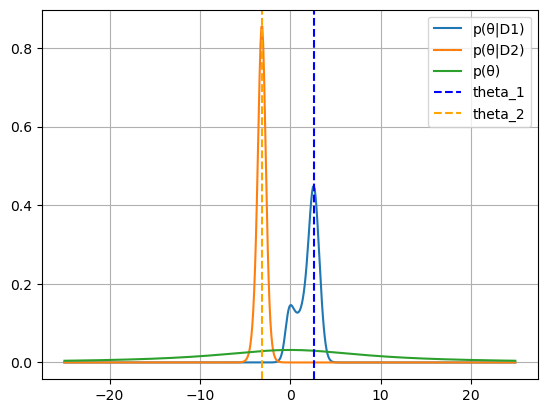

In [62]:
# Φτιάχνουμε τις γραφικές παραστάσεις τους
plt.figure(1)
plt.plot(u,p_list_d1,label='p(θ|D1)')
plt.plot(u,p_list_d2,label='p(θ|D2)')
plt.plot(u,p,label='p(θ)')
plt.axvline(x=theta1_hat,color='b',label='theta_1',linestyle='--')
plt.axvline(x=theta2_hat,color='orange',label='theta_2',linestyle='--')
plt.grid(True)
plt.legend()
plt.show()




### β)Tαξινόμηση των δεδομένων

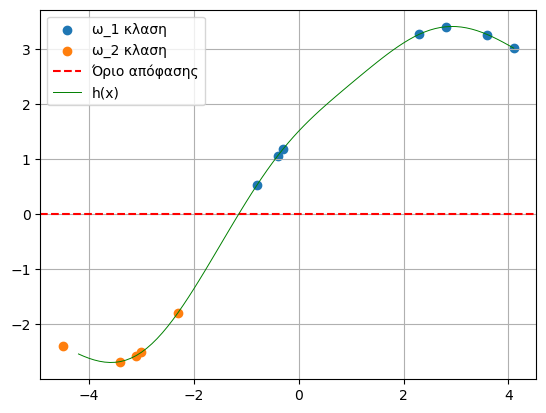

In [63]:
u1=np.arange(-10,10,0.1)
# έχουμε διαλέξει μεγάλο εύρος ολοκλήρωσης και μικρό βήμα οπότε θα πάρει λίγο χρόνο να τρέξει.


# υπολογίζουμε μέσω της συνάρτησης create τις p(x|D1) και p(x|D2)
class1.create_p(u1)

# Εφαρμόζουμε την συνάρτηση h για την πρόβλεψη των δεδομένων
D=D1+D2
h_values=class1.predict(D,7/12,5/12)


# Φτιάχουμε τιμές τις συνάρτησης h για να την οπτικοποιήσουμε
array=np.arange(-4.2,4.2,0.1)
h=class1.predict(array,7/12,5/12)

# Οπτικοποιούμε τα δεδομένα και τον κανόνα απόφασης
plt.figure()
plt.scatter(D1,h_values[0:len(D1)],label='ω_1 κλαση')
plt.scatter(D2,h_values[len(D1):len(D)],label='ω_2 κλαση')
plt.axhline(y=0,label='Όριο απόφασης',color='r',linestyle='--')
plt.plot(array,h,label='h(x)',color='g',linewidth=0.7)
plt.legend()
#plt.scatter(D,h_list)
plt.grid(True)
plt.show()

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Μέρος Γ</span>
</div>

Περίληψη Τρίτου Μέρους
1. Υλοποίηση Decision Tree Classifier με χρήση των χαρακτηριστικών 1 και 2 από το dataset
2. Υλοποίηση Random Forest Classifier με Bootstrap (με χρήση features 1 και 2)
3. Υλοποίηση Random Forest Classifier με Bootstrap αυτήν την φορά Custom Made
4. Έλεγχος Υπόθεσης - Υλοποίηση DT Classifier με χρήση των features 3 και 4.
5. Διάγραμμα Class Conditional PDF για όλα την οπτικοποίηση της κατανομής που ακολουθούν όλα features μέσα σε όλες τις κλάσεις

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Decision Tree Classifier</span>
</div>

1. Import Data and start Preprocessing

In [64]:
import numpy as np
import seaborn as sns
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris data as a pandas DataFrame
iris = load_iris(as_frame=True) 

X = iris.data.iloc[:, :2]  # Get only first two features from the database
y = iris.target # get labels

# Print to Check Dimentions
print("Shape of X:", X.shape) # must be (150, 2)
print("Shape of y:", y.shape) # must be (150,)

# Split Data into Train - Check (Split is done 50%-50%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #random_state = 42 to ensure that the random initialization is reproducible.
print("Shape of Training X:", X_train.shape) # must be (75, 2)
print("Shape of Training y:", y_train.shape) # must be (75,)
print("Shape of Test X:", X_test.shape) # must be (75, 2)
print("Shape of Test y:", y_test.shape) # must be (75, )

Shape of X: (150, 2)
Shape of y: (150,)
Shape of Training X: (75, 2)
Shape of Training y: (75,)
Shape of Test X: (75, 2)
Shape of Test y: (75,)


In [65]:
# View columns 1 and 2 of the Iris dataset
iris['data'].iloc[:, :2].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [66]:
# show dataset statistics
iris.data.iloc[:, :2].describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


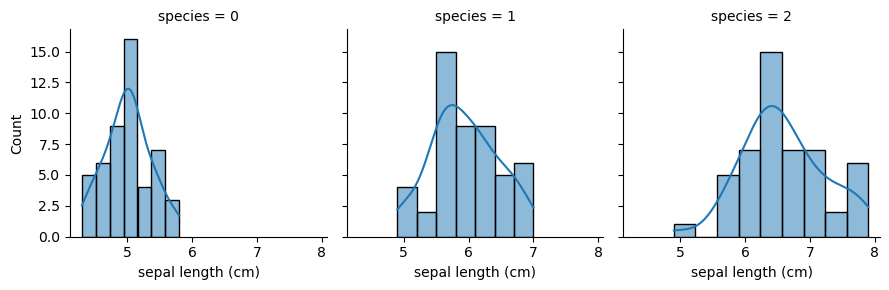

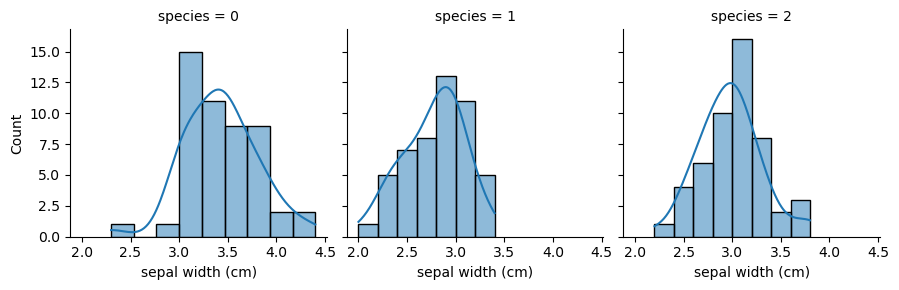

In [67]:
# Concat features and target into a single DataFrame
iris_df = pd.concat([X, y.rename("species")], axis=1)


# FacetGrid for Sepal Length
g1 = sns.FacetGrid(iris_df, col="species")
g1.map(sns.histplot, "sepal length (cm)", kde=True)
plt.show()

# FacetGrid for Sepal Width
g2 = sns.FacetGrid(iris_df, col="species")
g2.map(sns.histplot, "sepal width (cm)", kde=True)
plt.show()

Target counts:
Class 0: 50 occurrences
Class 1: 50 occurrences
Class 2: 50 occurrences


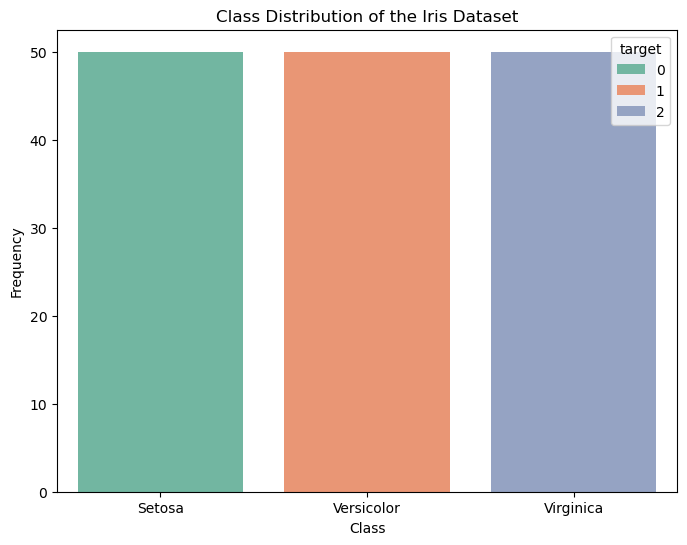

In [68]:
# Check if Dataset is Balanced
unique_targets, counts = np.unique(iris['target'], return_counts=True)

# Display Target Counts and Class Occurencies
print("Target counts:")
for target, count in zip(unique_targets, counts):
    print(f"Class {target}: {count} occurrences")

# Plot histogram for the classes
plt.figure(figsize=(8, 6))
sns.countplot(data=iris, x='target', hue='target', dodge=False, palette="Set2")
plt.title('Class Distribution of the Iris Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()


2. Find Best Value for Tree Depth

In [69]:
# Initialize values for best accuracy and best depth
best_accuracy = -1;
best_depth = 0;

# Run for loop to find best depth of DT Classifier
for i in range(1, 11):

    # Define, Train and Evaluate the Model
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Display Accuarcy for this Depth
    print(f"Depth: {i}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print()

    # Store Highest Accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy;
        best_depth = i;

# Display Best Accuracy Score and Best Tree Depth for the DT Classifier
print(f"Best Accuracy Score is: {best_accuracy * 100:.2f}%")
print(f"Achieved for depth: {best_depth}")


Depth: 1
Accuracy: 64.00%

Depth: 2
Accuracy: 77.33%

Depth: 3
Accuracy: 78.67%

Depth: 4
Accuracy: 77.33%

Depth: 5
Accuracy: 77.33%

Depth: 6
Accuracy: 77.33%

Depth: 7
Accuracy: 73.33%

Depth: 8
Accuracy: 73.33%

Depth: 9
Accuracy: 73.33%

Depth: 10
Accuracy: 72.00%

Best Accuracy Score is: 78.67%
Achieved for depth: 3


3. Train Best Model

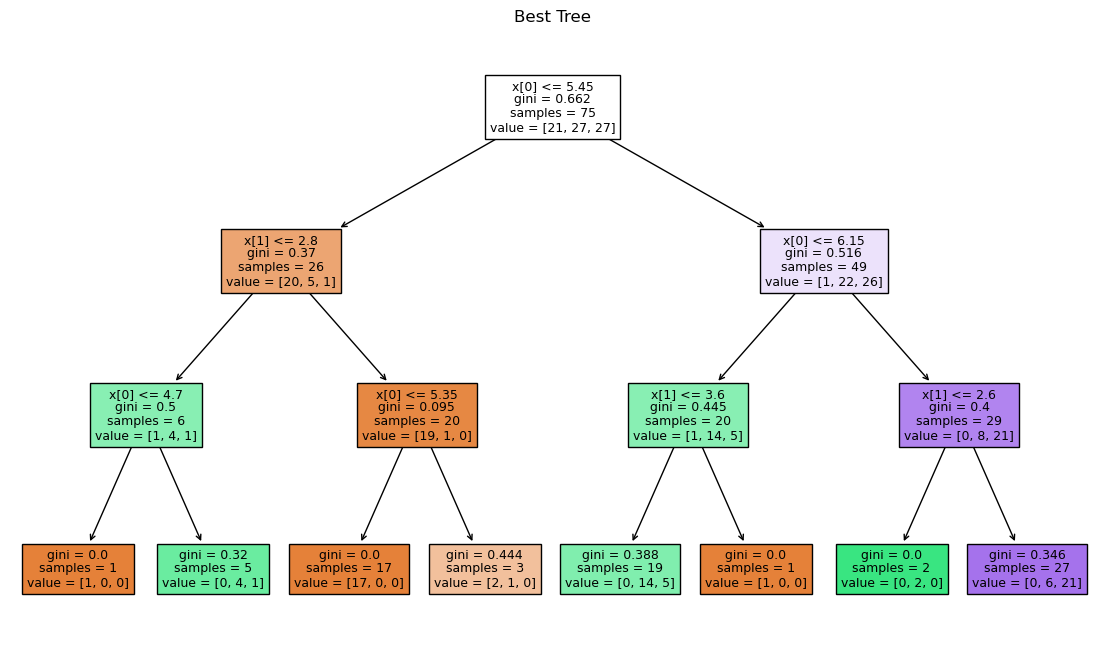

In [70]:
# Train and Evaluate Best Model 
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

# Visualize Best Decision Tree
plt.figure(figsize=(14, 8))
plot_tree(clf_best, filled=True)
plt.title("Best Tree")
plt.show()

4. Performance Metrics

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.75      0.65      0.70        23
   virginica       0.69      0.78      0.73        23

    accuracy                           0.83        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.83      0.83      0.83        75



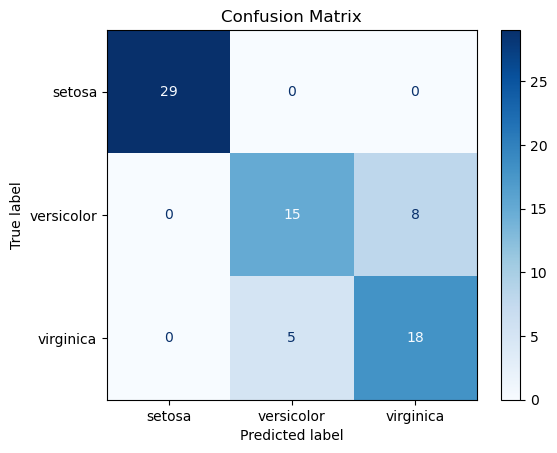

In [91]:
# Get Classification Report
classification_report = skl.metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print(classification_report)

# Get Confusion matrix
disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()

3. Plot Decision Boundaries

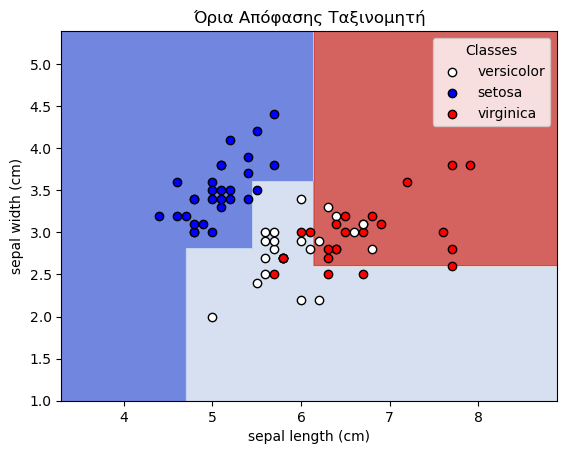

In [72]:
# Calculate Boundaries ansd Create Meshgrid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

X_pred = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)  # Combine the two features, xx and yy and flatten them
Z = clf_best.predict(X_pred) # Predict for each point in the Grid
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Scatter plot
plotted_classes = set()
# Plot the whole Test Set
for i in range(len(y_test)):
    label = iris.target_names[y_test.iloc[i]]  # Get target names for labels
    color = "blue" if label == "setosa" else "white" if label == "versicolor" else "red" # decide colors for each class
    if label not in plotted_classes:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k', label=label)
        plotted_classes.add(label)
    else:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k')

# Define x and y axis, title and legend for the plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Όρια Απόφασης Ταξινομητή")
plt.legend(title="Classes", loc="upper right")
plt.show()

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Random Forest Classifier</span>
</div>

1. Import Data and start Preprocessing

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Load Iris data
iris = load_iris(as_frame=True)
X = iris.data.iloc[:, :2]  # Get only first two features from the database
y = iris.target

# Split Data into Train - Check (50%-50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

2. Find Best Value for Tree Depth

In [74]:
# Initialize values for best accuracy and best depth
best_accuracy = -1;
best_depth = 0;

# Define value for gamma 
gamma = 0.5

# Run for loop to find best depth for the Random Forest Classifier (all trees must have the same depth)
for i in range(1, 10):
    # Define, Train and Evaluate the Model
    # According to the Assignment -> Estimators is set to 100 and Bootstrap is set to true.
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=i, bootstrap=True, max_samples=gamma, random_state=42) 
    rf_clf.fit(X_train, y_train) 
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Display Accuarcy for this Depth
    print(f"Depth: {i}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print()

    # Store Highest Accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy;
        best_depth = i;

# Display Best Accuracy Score and Best Tree Depth for the Random Forest Classifier
print(f"Best Accuracy Score is: {best_accuracy * 100:.2f}%")
print(f"Achieved for depth: {best_depth}")

Depth: 1
Accuracy: 76.00%

Depth: 2
Accuracy: 82.67%

Depth: 3
Accuracy: 80.00%

Depth: 4
Accuracy: 80.00%

Depth: 5
Accuracy: 78.67%

Depth: 6
Accuracy: 78.67%

Depth: 7
Accuracy: 78.67%

Depth: 8
Accuracy: 77.33%

Depth: 9
Accuracy: 78.67%

Best Accuracy Score is: 82.67%
Achieved for depth: 2


3. Train Best Model

In [75]:
# Train and Evaluate Best Model
gamma = 0.5
rf_clf_best = RandomForestClassifier(n_estimators=100, max_depth=best_depth, bootstrap=True, max_samples=gamma, random_state=42)
rf_clf_best.fit(X_train, y_train) 
y_pred = rf_clf_best.predict(X_test)

3. Performance Metrics

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.75      0.65      0.70        23
   virginica       0.69      0.78      0.73        23

    accuracy                           0.83        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.83      0.83      0.83        75



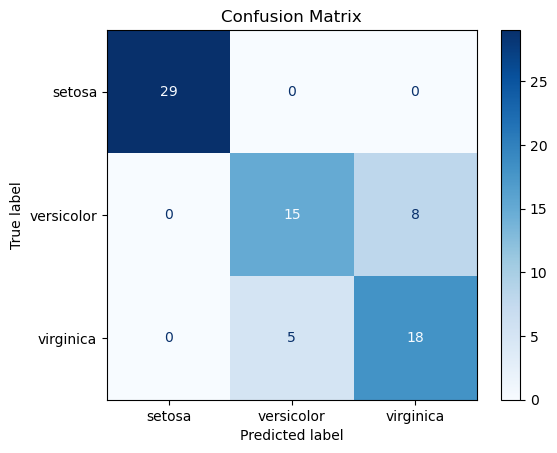

In [76]:
# Get Classification Report
classification_report = skl.metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print(classification_report)

# Get Confusion matrix
cm = skl.metrics.confusion_matrix(y_test, y_pred, labels=rf_clf_best.classes_).ravel()
disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()

3. Plot Decision Boundaries

(150,)
(150,)


C:\Users\dimia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


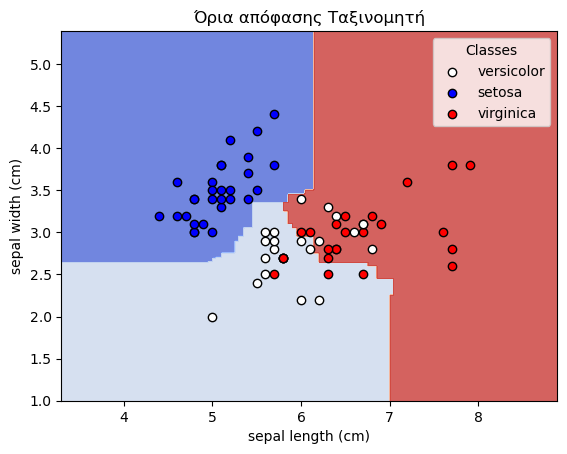

In [77]:
# Calculate Boundaries ansd Create Meshgrid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
print( X.iloc[:, 0].shape) # must be (150,)
print( X.iloc[:, 1].shape) # must be (150,)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) # Combine the two features xx and yy and flatten them

Z = rf_clf_best.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict for each point in the Grid
Z = Z.reshape(xx.shape)

# Plot Decision Boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Scatter Plot
plotted_classes = set()
# Plot the whole Test Set
for i in range(len(y_test)):
    label = iris.target_names[y_test.iloc[i]] # Get target names for labels
    color = "blue" if label == "setosa" else "white" if label == "versicolor" else "red" # decide colors for each class
    if label not in plotted_classes:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k', label=label)
        plotted_classes.add(label)
    else:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k')

# Define x and y axis, title and legend in the plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Όρια απόφασης Ταξινομητή")
plt.legend(title="Classes", loc="upper right")
plt.show()

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Random Forest Classifier - Custom Made Bootstrap</span>
</div>

1. Define Custom Made Bootstrap 

In [78]:
def myBootstrap(X, y, gamma=0.5):
    # Define the number of samples to be drawn from teh dataset based on the value of gamma
    n_samples = int(X.shape[0] * gamma)
    
    # Generate random indices with replacement  
    indices = np.random.choice(X.shape[0], size=n_samples, replace=True)

    return X.iloc[indices], y.iloc[indices]

2. Define Custom Made Random Forest Classifier

In [79]:
# Create Class that implements Random Forest Classifier from Scratch
class CustomRandomForestClassifier:
    # Define Initialization Function w/ parameters: estimators, gamma and max depth
    def __init__(self, n_estimators=10, max_depth=None, gamma=0.5):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.gamma = gamma
        self.trees = []

    # Define fit function 
    def fit(self, X, y):
        self.trees = []
        # Set for-loop for all estimators
        for i in range(self.n_estimators):
            # Call Custom Bootstrap function 
            X_bootstrap, y_bootstrap = myBootstrap(X, y, gamma=self.gamma)
            # Define, Train and Evaluate the Model
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=np.random.randint(0, 10000))
            tree.fit(X_bootstrap, y_bootstrap)
            # Add Model to the List
            self.trees.append(tree)

    # Define predict function  
    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        # Use Majority Votes to decide
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x, minlength=len(np.unique(y))).argmax(), axis=0, arr=tree_predictions)
        return majority_votes

# Initialize values for best accuracy and best depth
best_accuracy = -1
best_depth = 0
gamma = 0.5

# Run for loop to find best depth of Random Forest Classifier (the requirement that all trees must have the same depth still holds)
for ii in range(1, 10):
    # Define, Train and Evaluate the Model
    myRf = CustomRandomForestClassifier(n_estimators=100, max_depth=ii, gamma=gamma)
    myRf.fit(X_train, y_train)
    y_pred = myRf.predict(X_test)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Display depth and accuracy score 
    print(f"Depth: {ii}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print()
    
    # Store Highest Accuracy Score so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = ii

# Display the Best Depth and the Best Accuracy Score 
print(f"Best Accuracy Score is: {best_accuracy * 100:.2f}%")
print(f"Achieved for depth: {best_depth}")

Depth: 1
Accuracy: 76.00%

Depth: 2
Accuracy: 77.33%

Depth: 3
Accuracy: 80.00%

Depth: 4
Accuracy: 81.33%

Depth: 5
Accuracy: 74.67%

Depth: 6
Accuracy: 80.00%

Depth: 7
Accuracy: 80.00%

Depth: 8
Accuracy: 82.67%

Depth: 9
Accuracy: 78.67%

Best Accuracy Score is: 82.67%
Achieved for depth: 8


3. Train Best Model

In [80]:
myRf_best = CustomRandomForestClassifier(n_estimators=100, max_depth=best_depth, gamma=gamma)
myRf_best.fit(X_train, y_train)
y_pred = myRf_best.predict(X_test)

4. Performance Metrics

              precision    recall  f1-score   support

      setosa       1.00      0.97      0.98        29
  versicolor       0.63      0.74      0.68        23
   virginica       0.70      0.61      0.65        23

    accuracy                           0.79        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.79      0.79      0.79        75



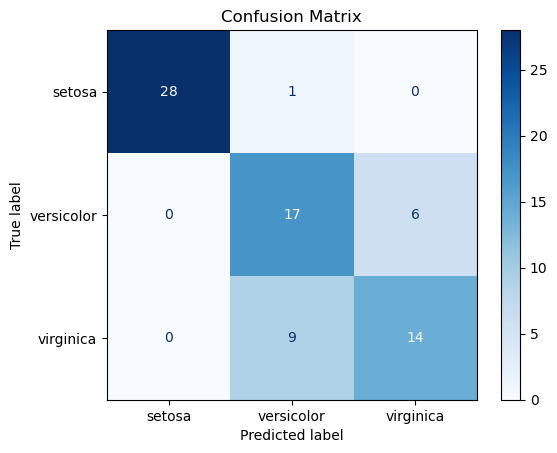

In [81]:
# Get Classification Report
classification_report = skl.metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print(classification_report)

# Get Confusion matrix
cm = skl.metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = skl.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

4. Plot Decision Boundaries

(150,)
(150,)


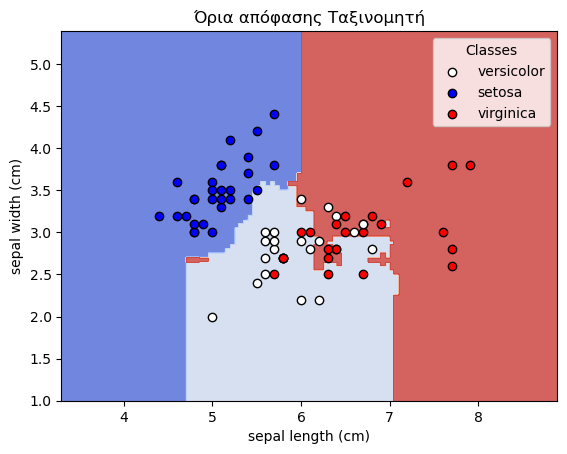

In [82]:
# Calculate Boundaries and Create Meshgrid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
print(X.iloc[:, 0].shape) # must be (150,)
print(X.iloc[:, 1].shape) # must be (150,)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) # Combine xx and yy and flatten them

Z = myRf_best.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)) # predict for each point in the Grid
Z = Z.reshape(xx.shape)

# Plot Decision Boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Scatter Plot
plotted_classes = set()
# Plot the Whole Test Set
for i in range(len(y_test)):
    label = iris.target_names[y_test.iloc[i]] # Get Target Names for Labels
    color = "blue" if label == "setosa" else "white" if label == "versicolor" else "red" # Decide Colors for each Class
    if label not in plotted_classes:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k', label=label)
        plotted_classes.add(label)
    else:
        plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], color=color, edgecolor='k')

# Define x and y axis, Title, Legend
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Όρια απόφασης Ταξινομητή")
plt.legend(title="Classes", loc="upper right")
plt.show()

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Different Values for γ</span>
</div>

Gamma: 0.10, Accuracy: 80.00%
Gamma: 0.20, Accuracy: 80.00%
Gamma: 0.30, Accuracy: 81.33%
Gamma: 0.40, Accuracy: 82.67%
Gamma: 0.50, Accuracy: 82.67%
Gamma: 0.60, Accuracy: 82.67%
Gamma: 0.70, Accuracy: 82.67%
Gamma: 0.80, Accuracy: 82.67%
Gamma: 0.90, Accuracy: 82.67%
Gamma: 1.00, Accuracy: 82.67%


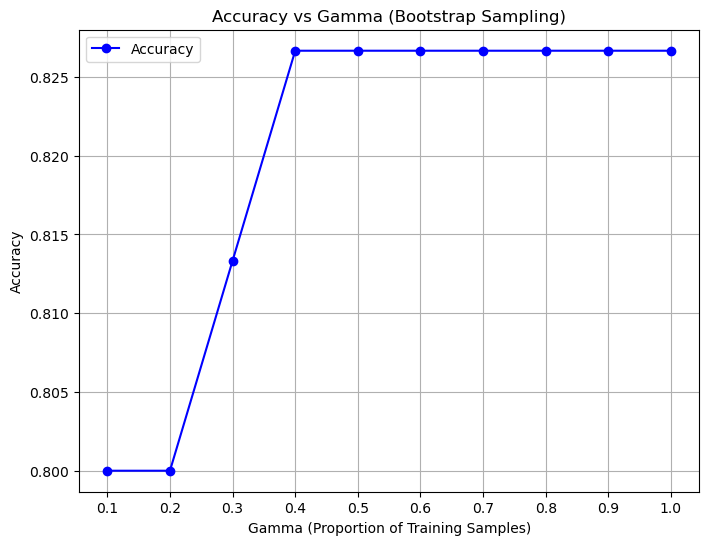

In [83]:
# Try Different Values for Parameter Gamma
gamma_values = np.linspace(0.1, 1.0, 10)  # From 10% to 100% of samples
accuracies = [] # Create empty array to store accuracies for each gamma value

# Run for loop for all values of gamma
for gamma in gamma_values: 
    # Define, Train and Evaluate the Model
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2, bootstrap=True, max_samples=gamma, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    # Calculate and Store Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    # Display gamma value and corresponding accuracy score
    print(f"Gamma: {gamma:.2f}, Accuracy: {accuracy * 100:.2f}%")

# Plot accuracy vs gamma
plt.figure(figsize=(8, 6))
plt.plot(gamma_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("Accuracy vs Gamma (Bootstrap Sampling)")
plt.xlabel("Gamma (Proportion of Training Samples)")
plt.ylabel("Accuracy")
plt.xticks(gamma_values, [f"{gamma:.1f}" for gamma in gamma_values])
plt.grid(True)
plt.legend()
plt.show()

Finally, Check Hypothesis for features 3 and 4

Best Accuracy Score is: 98.67%
Achieved for depth: 2


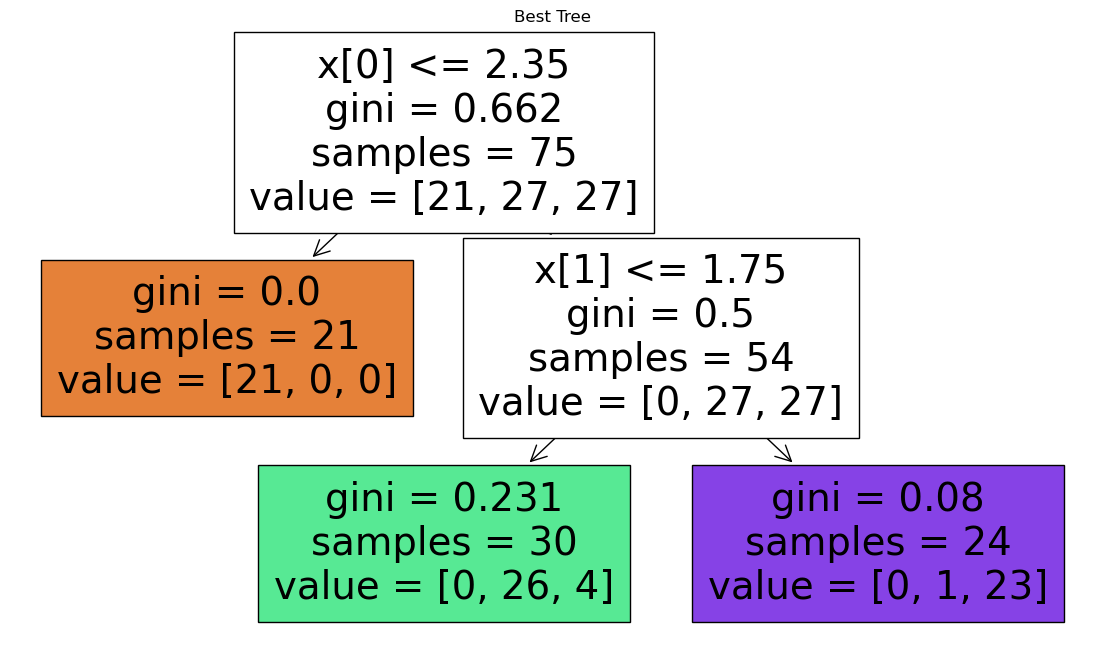

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



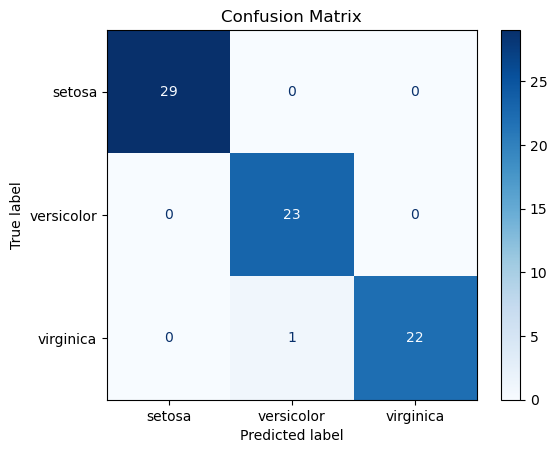

C:\Users\dimia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


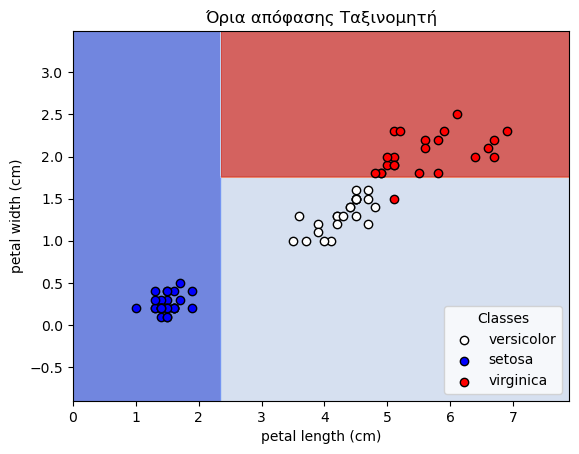

In [84]:
# Load Iris Data
iris = load_iris(as_frame=True)

# Get X and Y
X_new = iris.data.iloc[:, 2:4]  # Now get features 3 and 4
y_new = iris.target

# Split Data into Train - Check
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5, random_state=42)

# Initialize best accuracy and best depth 
best_accuracy_new = -1;
best_depth = 0;

# Run for loop to find best DT Classifier
for i in range(1, 20):
    # Define, Train and Evaluate the Model
    clf_new = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf_new.fit(X_train_new, y_train_new) 
    y_pred_new = clf_new.predict(X_test_new)
    # Calculate Accuracy Score
    accuracy_new = accuracy_score(y_test_new, y_pred_new)
    # Store Highest Accuracy Score so far
    if accuracy_new > best_accuracy_new:
        best_accuracy_new = accuracy_new;
        best_depth_new = i;
# Display Best Depth and Best Accuracy Score
print(f"Best Accuracy Score is: {best_accuracy_new * 100:.2f}%")
print(f"Achieved for depth: {best_depth_new}")

# Train Best Model 
clf_best_new = DecisionTreeClassifier(max_depth=best_depth_new, random_state=42)
clf_best_new.fit(X_train_new, y_train_new)
y_pred_new = clf_best_new.predict(X_test_new)

# Visualize Tree
plt.figure(figsize=(14, 8))
plot_tree(clf_best_new, filled=True)
plt.title("Best Tree")
plt.show()

# Get Classification Report
classification_report = skl.metrics.classification_report(y_test_new, y_pred_new, target_names=iris.target_names)
print(classification_report)

# Get Confusion matrix
disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test_new, y_pred_new, cmap='Blues', display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()

# Plot Boundary Surface
x_min_new, x_max_new = X_new.iloc[:, 0].min() - 1, X_new.iloc[:, 0].max() + 1
y_min_new, y_max_new = X_new.iloc[:, 1].min() - 1, X_new.iloc[:, 1].max() + 1
xx_new, yy_new = np.meshgrid(np.arange(x_min_new, x_max_new, 0.01), np.arange(y_min_new, y_max_new, 0.01))

Z_new = clf_best_new.predict(np.c_[xx_new.ravel(), yy_new.ravel()])
Z_new = Z_new.reshape(xx_new.shape)
plt.contourf(xx_new, yy_new, Z_new, alpha=0.8, cmap='coolwarm')

plotted_classes = set()
for i in range(len(y_test_new)): 
    label = iris.target_names[y_test_new.iloc[i]]
    color = "blue" if label == "setosa" else "white" if label == "versicolor" else "red"
    if label not in plotted_classes:
        plt.scatter(X_test_new.iloc[i, 0], X_test_new.iloc[i, 1], color=color, edgecolor='k', label=label)
        plotted_classes.add(label)
    else:
        plt.scatter(X_test_new.iloc[i, 0], X_test_new.iloc[i, 1], color=color, edgecolor='k')

# Plot Results
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(f"Όρια απόφασης Ταξινομητή")
plt.legend(title="Classes", loc="lower right")
plt.show()

<div style="text-align: center;">
    <span style="font-size:30px; font-weight: bold;">Class Conditional Probability Density Functions</span>
</div>

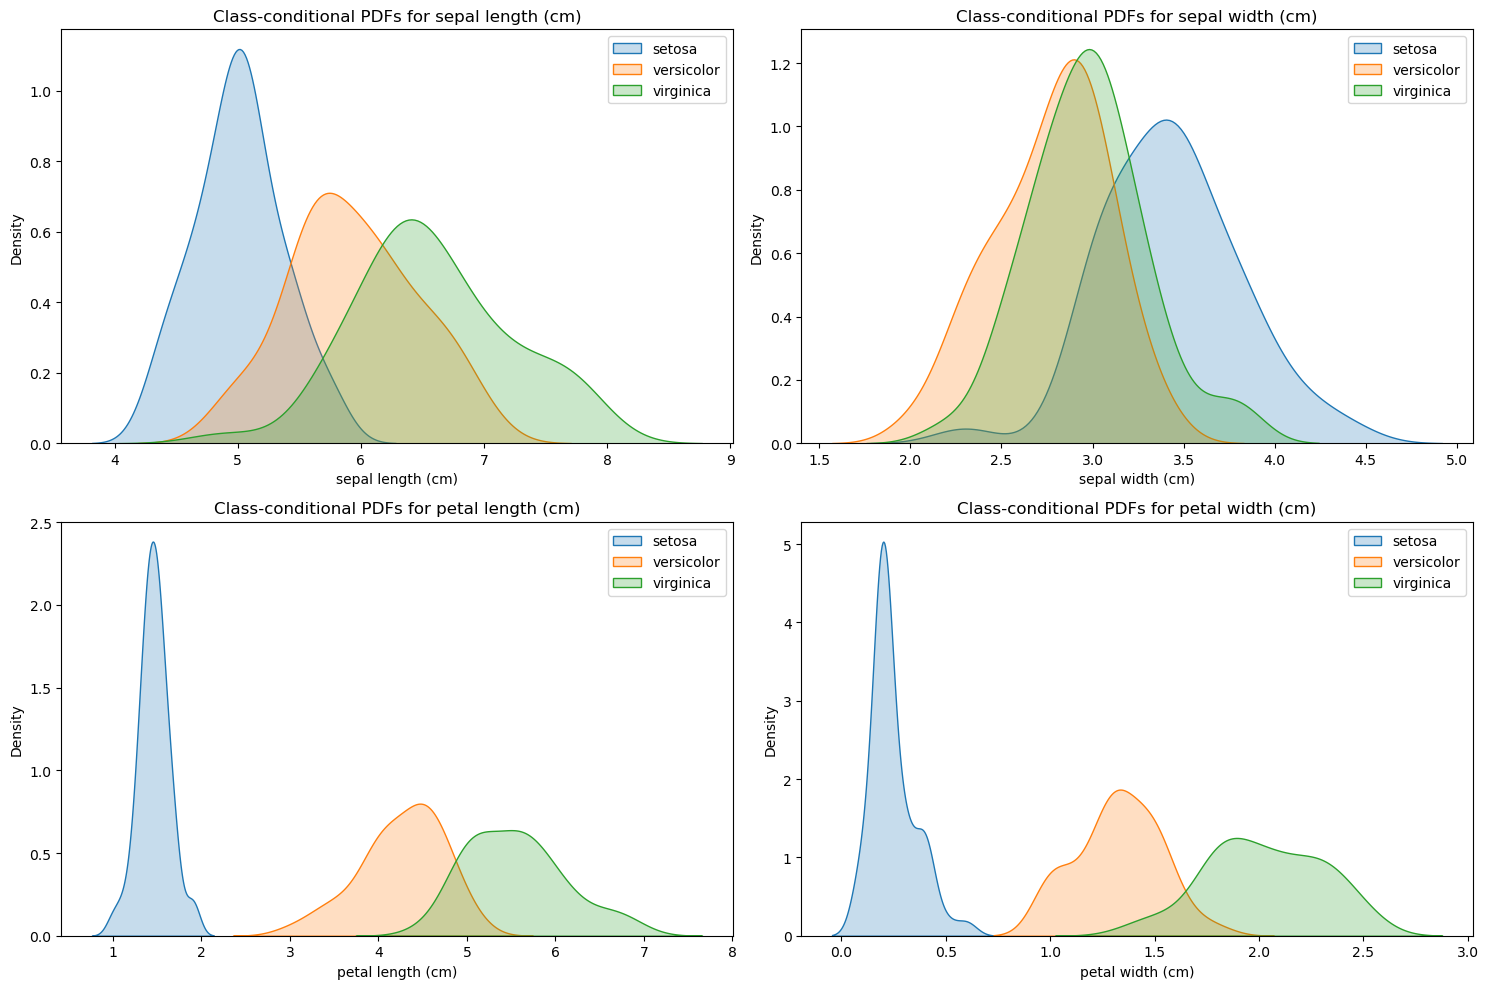

In [85]:
data = load_iris() # load again, this time keep all features
X = data.data
y = data.target
feature_names = data.feature_names  # Feature names
target_names = data.target_names  # Class names

# Convert data to a DataFrame for convenience
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

# Plot C;ass Conditional Probability Density Functions for all features across all classes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    for class_label in np.unique(y):
        class_data = df[df['class'] == class_label][feature]
        sns.kdeplot(class_data, label=target_names[class_label], fill=True)
    
    plt.title(f'Class-conditional PDFs for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()